In [1]:
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
import datetime
#this is to allow you to see the plot in the notebook
%matplotlib inline 
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

In [2]:
CONFIG = configparser.ConfigParser()
CONFIG.read(r'/home/jchew/local/db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [3]:
with con:   
    sql = pg.SQL('''
    SELECT intersection_uid, time_bin, avg_vol, gap_size 
    FROM miovision_api.volume_gap
    WHERE time_bin IN ('03:00:00'::time)
    ''')
data_3am = pandasql.read_sql(sql, con)
    #print_table(sql, con)

Text(0.5, 1.0, 'Hourly volumes vs gap sizes at 3am')

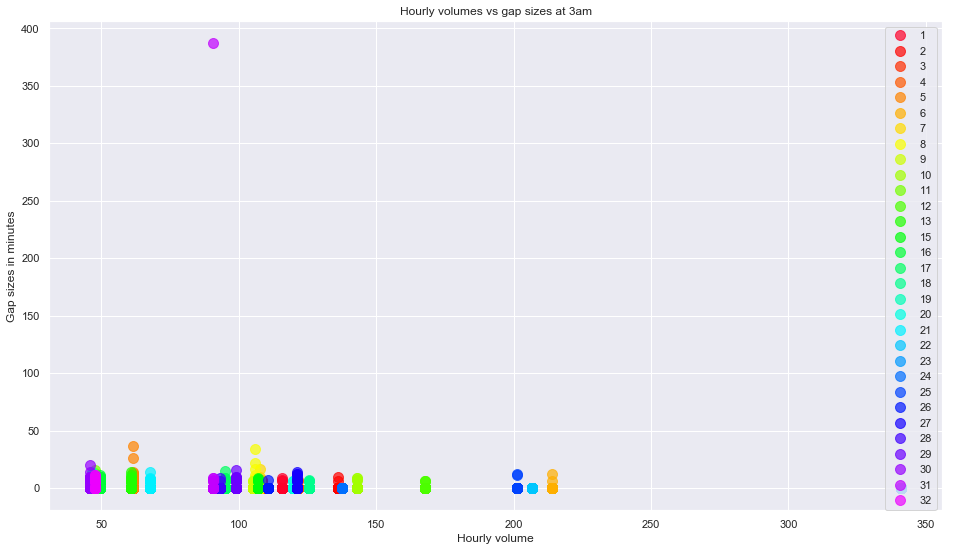

In [4]:
fig, ax = plt.subplots (1,1, figsize=(16,9))
NUM_COLORS = 32
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = data_3am.groupby('intersection_uid')
for i, (intersection_uid, data) in enumerate(groups):
    ax.plot(data.avg_vol, data.gap_size, marker = 'o', markersize = 10 ,
            alpha = 0.7, linestyle = '', label = intersection_uid, color = colors[i])

ax.legend()
ax.set_xlabel('Hourly volume')
ax.set_ylabel('Gap sizes in minutes')
ax.set_title('Hourly volumes vs gap sizes at 3am')

In [6]:
with con:
    sql = pg.SQL('''
    SELECT intersection_uid, time_bin, avg_vol, gap_size  
    FROM miovision_api.volume_gap
    WHERE time_bin IN ('17:00:00'::time)
    ''')
data_5pm = pandasql.read_sql(sql, con)

Text(0.5, 1.0, 'Hourly volumes vs gap sizes at 5pm')

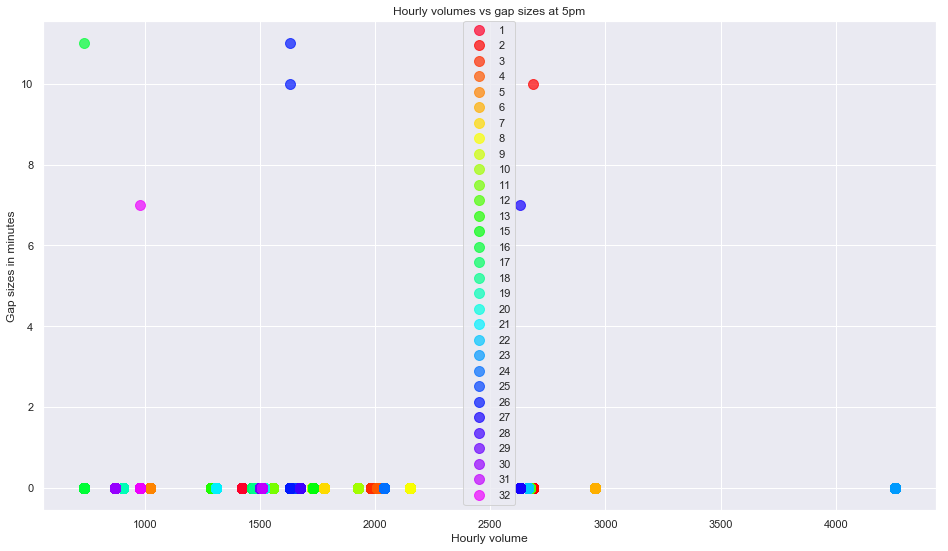

In [7]:
fig, ax = plt.subplots (1,1, figsize=(16,9))
NUM_COLORS = 32
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = data_5pm.groupby('intersection_uid')
for i, (intersection_uid, data) in enumerate(groups):
    ax.plot(data.avg_vol, data.gap_size, marker = 'o', markersize = 10 ,
            alpha = 0.7, linestyle = '', label = intersection_uid, color = colors[i])

ax.legend()
ax.set_xlabel('Hourly volume')
ax.set_ylabel('Gap sizes in minutes')
ax.set_title('Hourly volumes vs gap sizes at 5pm')

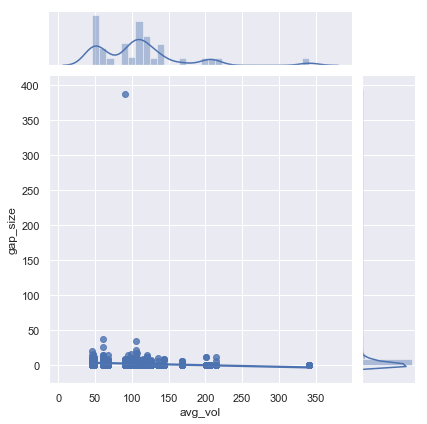

In [28]:
# use SNS jointplot instead since it shows distribution better
ax = sns.jointplot(x='avg_vol', y='gap_size', kind='reg', data=data_3am)

The above plot has an outlier and so it does not show the distribution pattern nicely. 
Hence, below plot is produced.

Text(0.5, 1.0, '3am')

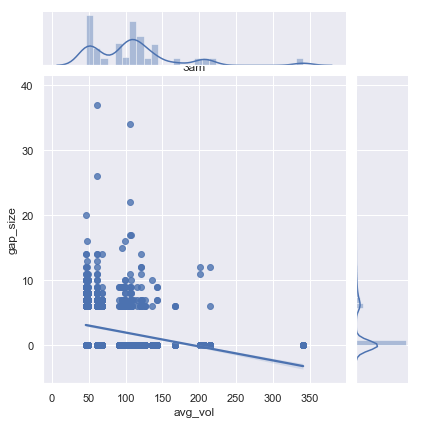

In [35]:
with con:   
    sql = pg.SQL('''
    SELECT intersection_uid, time_bin, avg_vol, gap_size 
    FROM miovision_api.volume_gap
    WHERE time_bin IN ('03:00:00'::time)
    AND gap_size < 100
    ''')
data_3am_no_outlier = pandasql.read_sql(sql, con)

ax = sns.jointplot(x='avg_vol', y='gap_size', kind='reg', data=data_3am_no_outlier)
plt.title('3am')

Text(0.5, 1.0, '5pm')

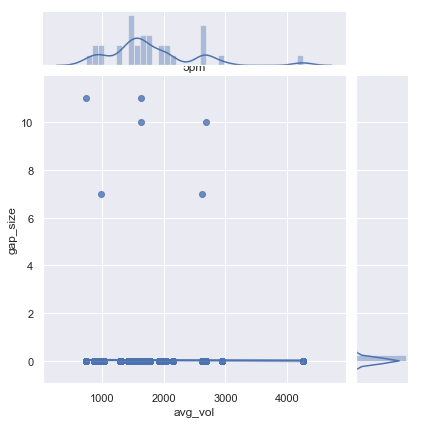

In [36]:
ax = sns.jointplot(x='avg_vol', y='gap_size', kind='reg', data=data_5pm)
plt.title('5pm')